> ## Analyzing Ford GoBike System Data
> -  ### By Wael Alharbi 

> ## Introduction :
Ford GoBike is the Bay Area's new bike share system, with thousands of public bikes for use across San Francisco, East Bay and San Jose. Renting Bikes is designed with convenience in mind. it’s a fun and affordable way to get around town.It aslo offers Single Ride is 2 dollars per day which is great for one way trip, Monthly Memberships is 15 dollars per month for its good deal for locals and Access Pass for 10 dollars which is perfect for exploring.



## Gathering Data :

In [109]:
from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import matplotlib.dates as mdates
import seaborn as sns
import datetime
import math
import calendar
import warnings

from IPython.display import Image
%matplotlib inline


In [110]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Assessing and Cleaning Data : 

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [112]:
df.duplicated().sum()

0

In [113]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [114]:
df.sample(30)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
142494,248,2019-02-07 17:07:22.0020,2019-02-07 17:11:30.1130,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,182.0,19th Street BART Station,37.809013,-122.268247,2037,Subscriber,1954.0,Male,No
92858,238,2019-02-15 18:21:26.4660,2019-02-15 18:25:24.8160,343.0,Bryant St at 2nd St,37.783172,-122.393572,27.0,Beale St at Harrison St,37.788059,-122.391865,903,Subscriber,1984.0,Female,No
122195,955,2019-02-11 12:31:08.2100,2019-02-11 12:47:03.2360,181.0,Grand Ave at Webster St,37.811377,-122.265192,155.0,Emeryville Public Market,37.840521,-122.293528,4642,Subscriber,1982.0,Male,No
13147,508,2019-02-27 16:46:29.9200,2019-02-27 16:54:58.8650,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,73.0,Pierce St at Haight St,37.771793,-122.433708,4968,Subscriber,1988.0,Male,No
163375,491,2019-02-05 09:20:53.5220,2019-02-05 09:29:04.5340,61.0,Howard St at 8th St,37.776513,-122.411306,64.0,5th St at Brannan St,37.776754,-122.399018,2889,Subscriber,1990.0,Female,No
42119,319,2019-02-22 17:53:27.9860,2019-02-22 17:58:47.0580,176.0,MacArthur BART Station,37.828410,-122.266315,214.0,Market St at Brockhurst St,37.823321,-122.275732,3404,Subscriber,1986.0,Female,No
28690,1210,2019-02-25 08:15:47.1170,2019-02-25 08:35:57.2060,56.0,Koshland Park,37.773414,-122.427317,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,6260,Subscriber,1987.0,Male,No
82463,200,2019-02-18 10:09:25.3460,2019-02-18 10:12:45.5840,61.0,Howard St at 8th St,37.776513,-122.411306,350.0,8th St at Brannan St,37.771431,-122.405787,5408,Customer,1996.0,Male,No
16997,390,2019-02-27 07:49:38.9940,2019-02-27 07:56:09.5790,27.0,Beale St at Harrison St,37.788059,-122.391865,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,5541,Subscriber,1984.0,Male,No
152180,880,2019-02-06 16:11:56.7780,2019-02-06 16:26:37.0830,81.0,Berry St at 4th St,37.775880,-122.393170,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,5331,Subscriber,1991.0,Female,No


In [115]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [116]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [117]:
# Remove null value
df = df[df.start_station_id.notnull()]
df = df[df.member_birth_year.notnull()]

In [118]:
# Correct wronng datatype for : start time and end time 
df.start_time  = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [119]:
# Change datatype of user_type , gender , bike_share_for_all_trip to category datatype
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')
df.bike_share_for_all_trip = df.bike_share_for_all_trip.astype('category')

In [120]:
# Change bike id, start_station_id, end_station_id datatype to string datatype
df.bike_id = df.bike_id.astype(str)
df.start_station_id = df.bike_id.astype(str)
df.end_station_id = df.bike_id.astype(str)


In [121]:
# Create column for member age  
df['member_age'] = 2021-df['member_birth_year']
df.member_age.describe()

count    174952.000000
mean         36.196865
std          10.118731
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: member_age, dtype: float64

In [122]:
# Create function for convert the customer’s age into 6 stages to be able to analyze it¶
def ages(member_age):
    if 20<member_age<=30:
        return '20-30'
    
    elif 30<member_age<=40:
        return '31-40'  
    
    elif 40<member_age<=50:
        return '41-50'
    
    elif 50<member_age<=60:
        return '51-60'
    
    elif 60<member_age<=70:
        return '61-70'
    
    else :
        return '> 71'

df['age_stages'] = df['member_age'].apply(ages)


In [123]:
df.age_stages.value_counts()

31-40    72648
20-30    56626
41-50    27787
51-60    12897
61-70     4108
> 71       886
Name: age_stages, dtype: int64

In [124]:
age_order = ['20-30', '31-40', '41-50', '51-60', '61-70' , '> 71']

In [125]:
# # Create column for member age
df['start_time_day'] = pd.DatetimeIndex(df['start_time']).day
df['start_time_hour'] = pd.DatetimeIndex(df['start_time']).hour
df['start_time_weekOfDay']=df['start_time'].dt.strftime('%a')

In [126]:
df.start_time.describe()

count                         174952
unique                        174941
top       2019-02-07 17:56:08.897000
freq                               2
first     2019-02-01 00:00:20.636000
last      2019-02-28 23:59:18.548000
Name: start_time, dtype: object

In [127]:
df.start_time_day.value_counts(sort=False)

1     5827
2     3003
3     2709
4     5273
5     8136
6     8655
7     8798
8     6094
9     2549
10    3697
11    8315
12    8155
13    3078
14    6346
15    6977
16    3734
17    3877
18    5296
19    9096
20    9246
21    9120
22    8765
23    5128
24    4229
25    6757
26    5197
27    7447
28    9448
Name: start_time_day, dtype: int64

In [128]:
df.start_time_hour.value_counts(sort=False)

0       893
1       525
2       355
3       164
4       227
5       866
6      3293
7     10231
8     20227
9     15204
10     7970
11     7461
12     8220
13     8098
14     7677
15     8646
16    13473
17    20904
18    16118
19     9424
20     6211
21     4400
22     2793
23     1572
Name: start_time_hour, dtype: int64

In [129]:
df.start_time_weekOfDay.value_counts()

Thu    33712
Tue    30584
Wed    28426
Fri    27663
Mon    25641
Sun    14512
Sat    14414
Name: start_time_weekOfDay, dtype: int64

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [131]:
df.member_gender.value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [132]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
member_age                 0
age_stages                 0
start_time_day             0
start_time_hour            0
start_time_weekOfDay       0
dtype: int64

> ## Structure of the Dataset : 
 > Originally there were approx. 183,000 bike rides that happen in February 2019 . The dataset contained features about:
 
 - trip duration: start_time,end_time, how long the trip took in seconds
 - stations: start and end station id, name, geolocation (latitude/longitude)
 - rented bikes: bike id
 - customer data: gender, birth date and user type
 - rented bikes: bike id


 -  The dataset was further added few columns to find interesting analysis:
 -  Bike time: month, day, hour of the day, weekday (both for start and end date)
 -  customer: age


## What is/are the main feature(s) of interest in your dataset? 
>- Average trip duration
>- Age group with high demand 
>- Gender 


## What features in the dataset do you think will help support your investigation into your feature(s) of interest?
- Bike time
- Trip duration
- Age

## Univariate Exploration :

> ### I'll start by looking at : 
> #### trip over monthdays and weekdays.
> #### The most used age groups for bike.
> #### Gender distribution.
> #### Duration ride distribution.

## Distribution of trip over day hours

In [133]:
base_color = sns.color_palette()[0]

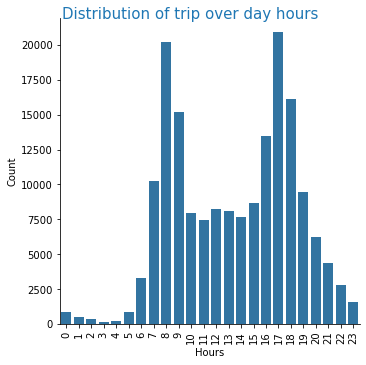

In [134]:
u = sns.catplot(data=df, x='start_time_hour', kind='count', color=base_color )
u.set_axis_labels("Hours", "Count")
u.fig.suptitle('Distribution of trip over day hours', fontsize=15, color=base_color , y =1);
plt.xticks(rotation=90);


> the system is used increasingly in two shifts, the first from 7 to 9 in the morning and back down, the second period between 4 pm to 6 pm.

## Distribution of trip over weekdays

<Figure size 720x720 with 0 Axes>

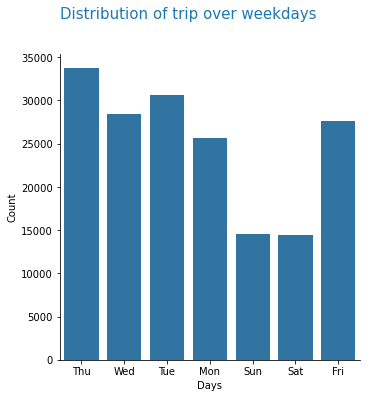

In [135]:
plt.figure(figsize = [10, 10]);
u = sns.catplot(data=df, x='start_time_weekOfDay', kind='count', color=base_color )
u.set_axis_labels("Days", "Count")
u.fig.suptitle('Distribution of trip over weekdays ', fontsize=15, color=base_color , y =1.1);

> The system is used increasingly On work days and it goes down at the weekend.

## Distribution of Ages over trips

<Figure size 720x720 with 0 Axes>

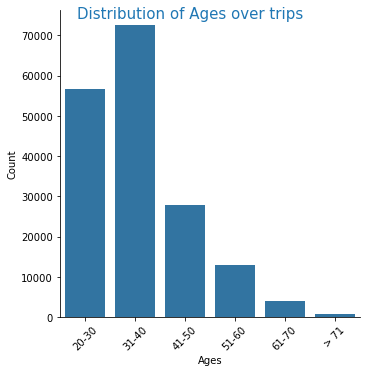

In [136]:
plt.figure(figsize = [10, 10]);
u = sns.catplot(data=df, x='age_stages', kind='count', color=base_color , order=age_order)
u.set_axis_labels("Ages", "Count")
u.fig.suptitle('Distribution of Ages over trips', fontsize=15, color=base_color);
plt.xticks(rotation=45);

> Most of the users are between 31-40 years old.

In [137]:
df['duration_min'] = df['duration_sec']/60
df['duration_min'] = df['duration_min'].astype(int)
df.duration_min.describe()

count    174952.000000
mean         11.241461
std          27.371269
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

## Distribution of trips based on Gender

<Figure size 720x720 with 0 Axes>

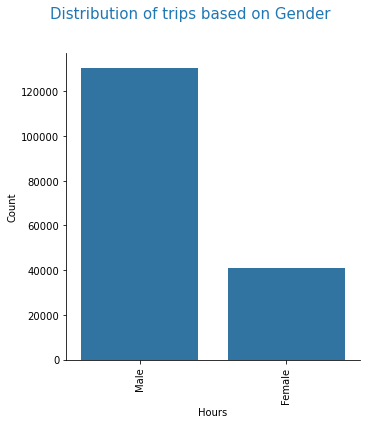

In [138]:
plt.figure(figsize = [10, 10])
u = sns.catplot(data=df, x='member_gender', kind='count', color=base_color ,order=['Male' , 'Female' ] )
u.set_axis_labels("Hours", "Count")
u.fig.suptitle('Distribution of trips based on Gender', fontsize=15, color=base_color , y =1.1 );
plt.xticks(rotation=90);


> From bar graph it shows male members took more rides compared to percentage of female riders 

## Distribution of trips per minute 

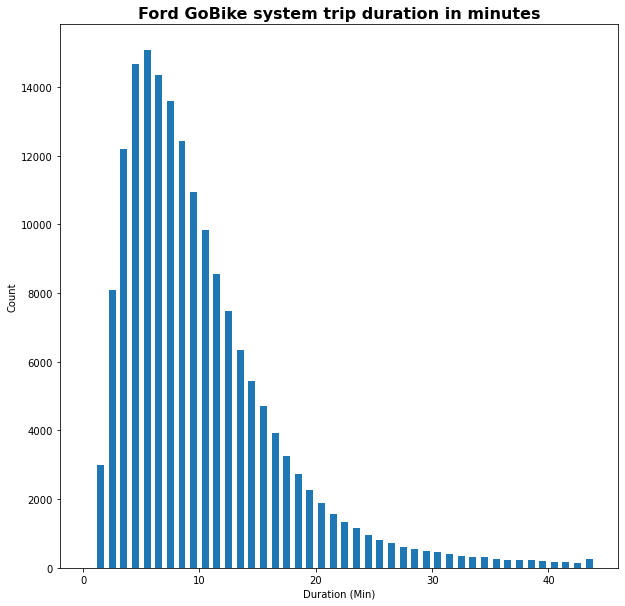

In [139]:
plt.figure(figsize = [10, 10])
bin_edges = np.arange(0, 45, 1)
plt.hist(data = df, x = 'duration_min', bins = bin_edges, rwidth = 0.6);
plt.title("Ford GoBike system trip duration in minutes", fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.ylabel('Count');


> It looks most of the trips were less than half an hour long with most of them fell between 5 to 10 minutes range.

## Bivariate Exploration 

> In this section I will further explore the dataset by adding the User type and age stages and member gender to the analysis.

## User type split for GoBike sharing system

In [140]:
male = df.query('member_gender == "Male"')['bike_id'].count()
female = df.query('member_gender == "Female"')['bike_id'].count()
other = df.query('member_gender == "Other"')['bike_id'].count()
male_proportion = male / df['bike_id'].count()
female_proportion = female / df['bike_id'].count()
other_proportion = other / df['bike_id'].count()

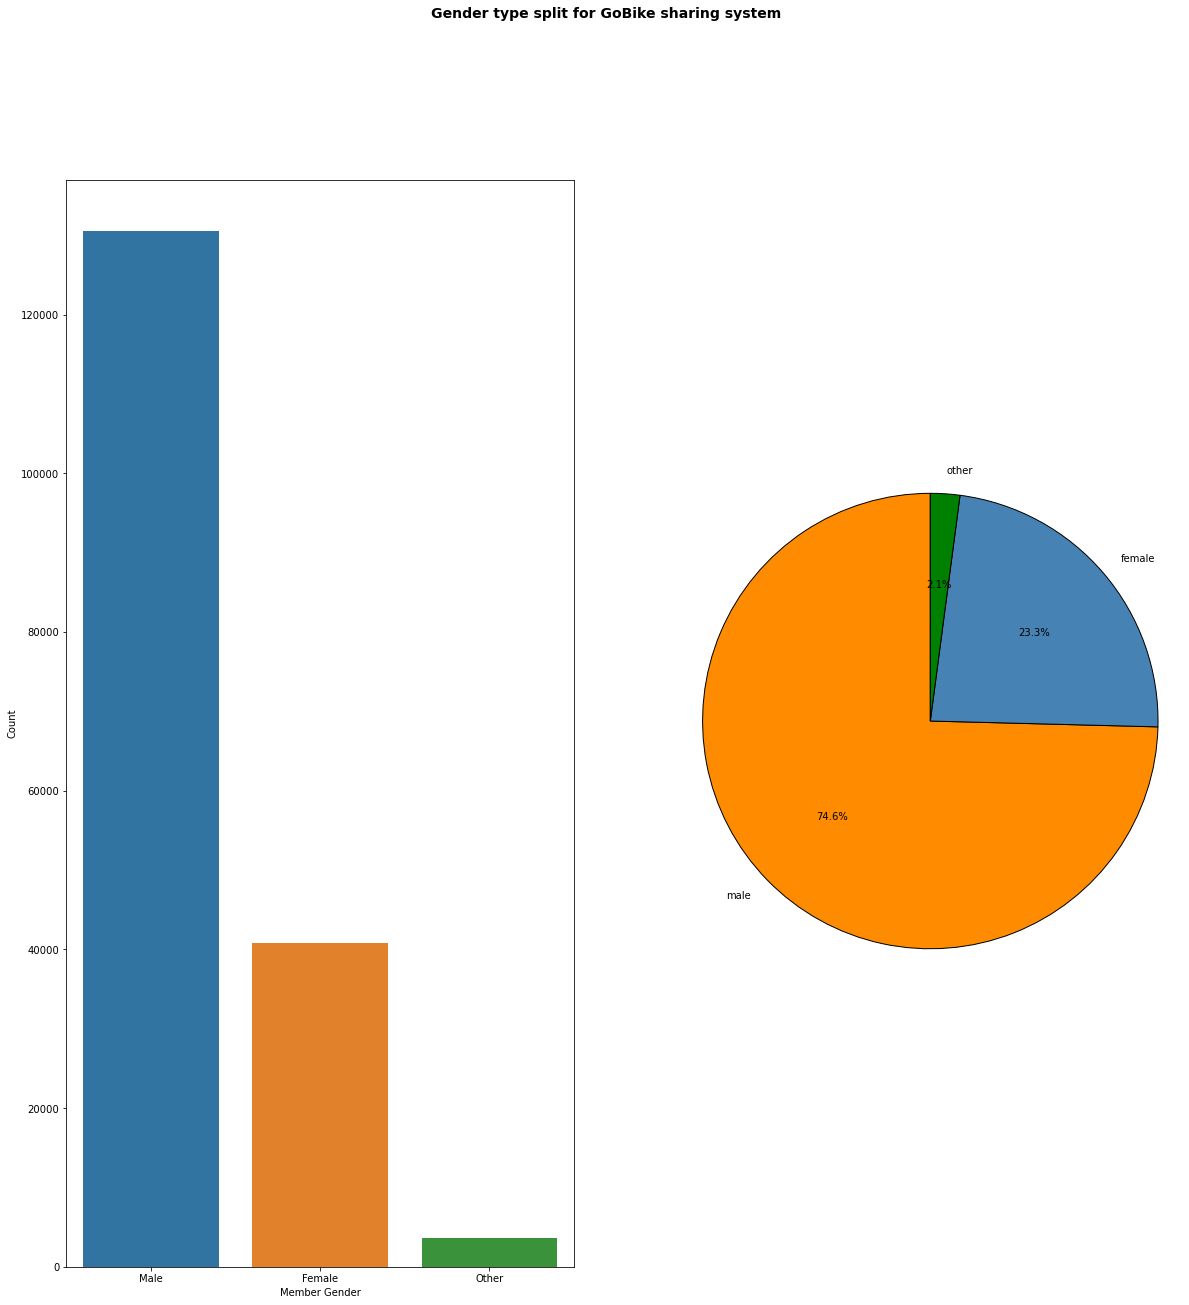

In [141]:
plt.figure(figsize = [20, 20])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df, x="member_gender", order=df.member_gender.value_counts().index)
g.set_xlabel('Member Gender')
g.set_ylabel('Count')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['male', 'female' , 'other' ]
sizes = [male_proportion, female_proportion, other_proportion]
colors = ['darkorange', 'steelblue' , 'green']

plt.pie(sizes, labels=labels,colors = colors, wedgeprops={'edgecolor' : 'black'},autopct='%1.1f%%' ,startangle=90)
plt.axis('equal')

plt.suptitle('Gender type split for GoBike sharing system', y=1, fontsize=14, fontweight='semibold');

> The graph above shows,Men get the largest percentage of trips

## Distribution of daily trips based on gender 

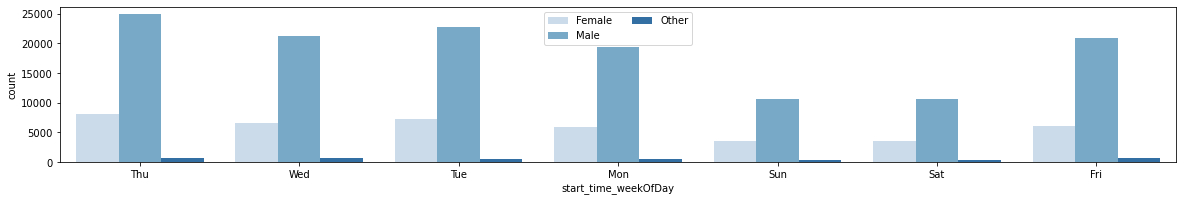

In [142]:
plt.figure(figsize = [20, 20]);
ax = plt.subplot(6, 1, 2);
sns.countplot(data = df, x = 'start_time_weekOfDay', hue = 'member_gender', palette = 'Blues');
ax.legend(ncol = 2); 

> The graph above shows ,the number of rides per day, and we can see the weekend it is has the lowest number of rides for both male and female.

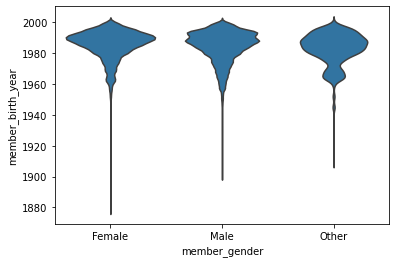

In [143]:
sns.violinplot(data = df.query("member_birth_year > 1778"),x = 'member_gender',y='member_birth_year',color = sns.color_palette()[0],inner=None);

> As shown in the charts above , Most of Male and Female born between 1980 - 2000.

> As shown in the charts above ,the number of rides per day, and we can see the weekend it is has the lowest number of rides for both male and female.

## User type split for GoBike sharing system 

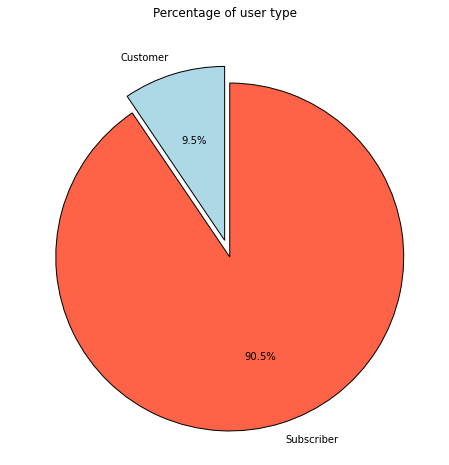

In [144]:
sorted_counts = df['user_type'].value_counts()
percent = sorted_counts[1] / sorted_counts[0].sum()*100
slide = [sorted_counts[0],sorted_counts[1]]
label = ['Customer' , "Subscriber"]
color = ["lightblue" , "tomato"]
explode = [0,0.1]
plt.pie(slide ,startangle= 90 , labels = label ,colors=color,explode = explode,autopct='%1.1f%%' ,wedgeprops={'edgecolor' : 'black'})
plt.title("Percentage of user type")
fig = plt.gcf()
fig.set_size_inches(8,8);


> The graph above shows , Most of the customers type is "subscriber"

## Age distribution based on the type of user 

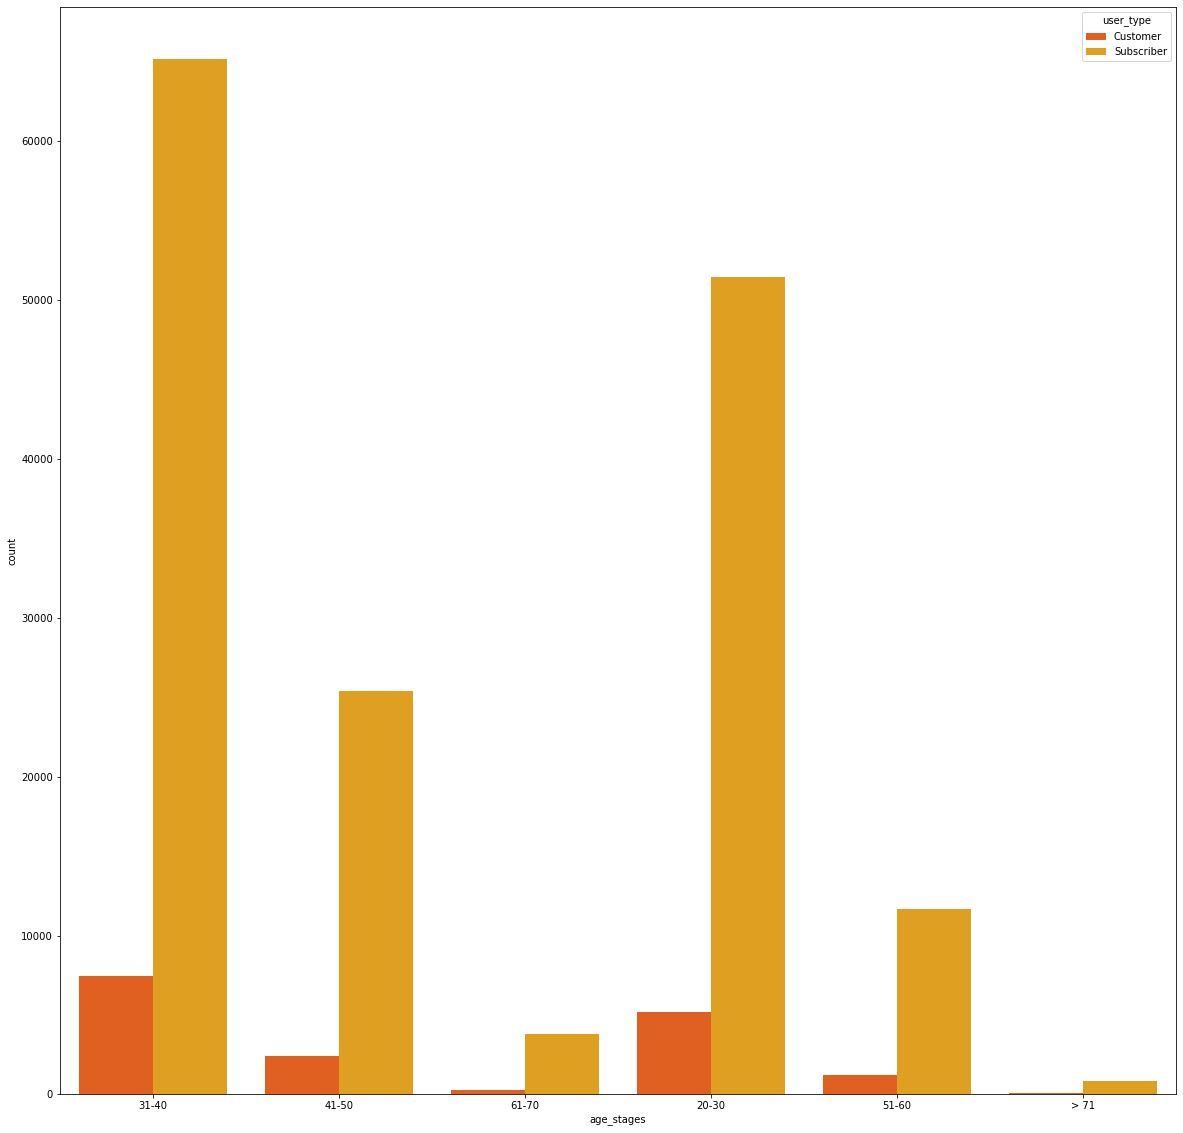

In [145]:
plt.figure(figsize = [20, 20]);
sns.countplot(data = df, x = 'age_stages', hue = 'user_type', palette = 'autumn' );

In [146]:
df.member_birth_year.describe()

count    174952.000000
mean       1984.803135
std          10.118731
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

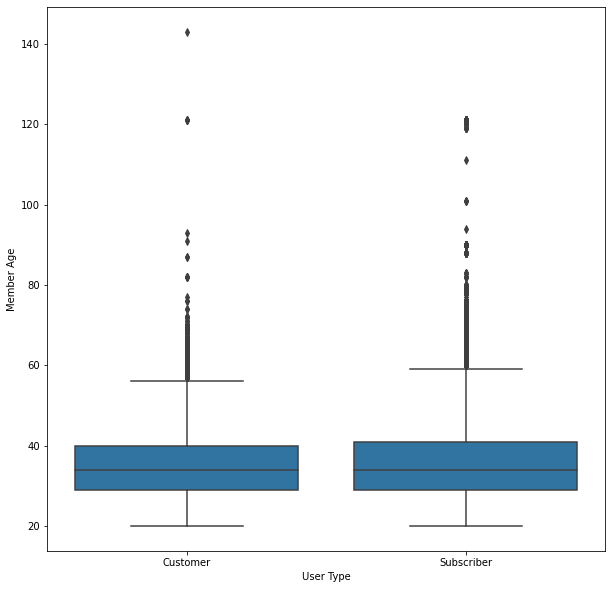

In [147]:
plt.figure(figsize = [10, 10]);
sns.boxplot(data=df, x='user_type', y='member_age', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Member Age');


> As shown in the chart above , Most of the customers type is "subscriber" , They are from the age group of 31-40 years.


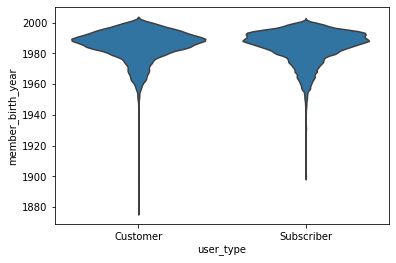

In [148]:
sns.violinplot(data = df.query("member_birth_year > 1778"),x = 'user_type',y='member_birth_year',color = sns.color_palette()[0],inner=None);

> > As shown in the charts above , Most of "customer" and "Subscriber" born between 1980 - 2000.

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> - the system is used increasingly in two shifts, the first from 7 to 9 in the morning and back down, the second period between 4 pm to 6 pm.
> - The system is used increasingly On workdays and it goes down at the weekend.
> - Most of the users are between 31-40 years old.
> - Male members took more rides compared to the percentage of female riders
> - Most of the trips were less than half an hour long with most of them fell between the 5 to 10 minutes range.
> - The weekend it has the lowest number of rides for both male and female
> - Most of the customer's type is "subscriber", They are from the age group of 31-40 years.
> - Most of the "customer" and "Subscriber" were born between 1980 - 2000.

## Multivariate Exploration

> In this section I will further explore the dataset by adding gender to the customer type and check the daily distribution of bike rides during weekdays for customers and subscribers.

## The Daily Usage of Bike Rides per User Type Based on Gender 

<Figure size 1800x1800 with 0 Axes>

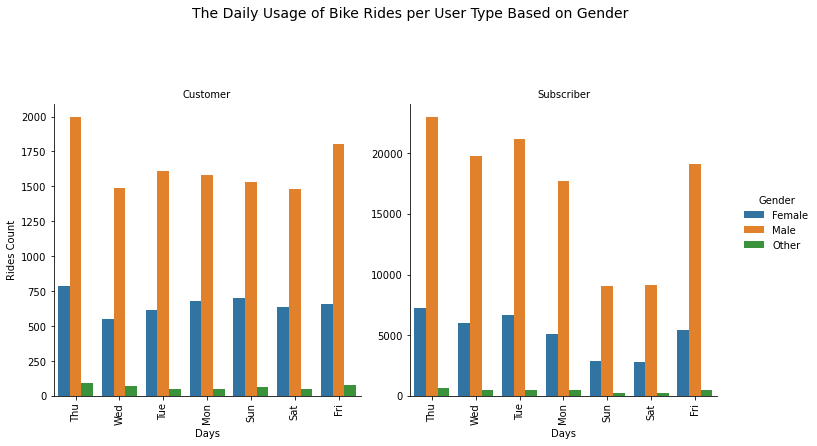

In [149]:
plt.figure(figsize = [25, 25]);
u = sns.catplot(data=df, x='start_time_weekOfDay', col="user_type", aspect=20/20,hue='member_gender', kind='count',sharey=False)

u.set_axis_labels('Days', 'Rides Count')
u.set_xticklabels(rotation=90)
u._legend.set_title('Gender')
u.set_titles('{col_name}');
u.fig.suptitle('The Daily Usage of Bike Rides per User Type Based on Gender', fontsize=14, y=1.2);


> Trips are go down for both male and female subscribers at the weekend, And customers maintain more than 1,500 rides per day almost every day and there is no high drop on the weekend.

## The Daily Usage of Bike Rides per User Type Based on Age

<Figure size 1800x1800 with 0 Axes>

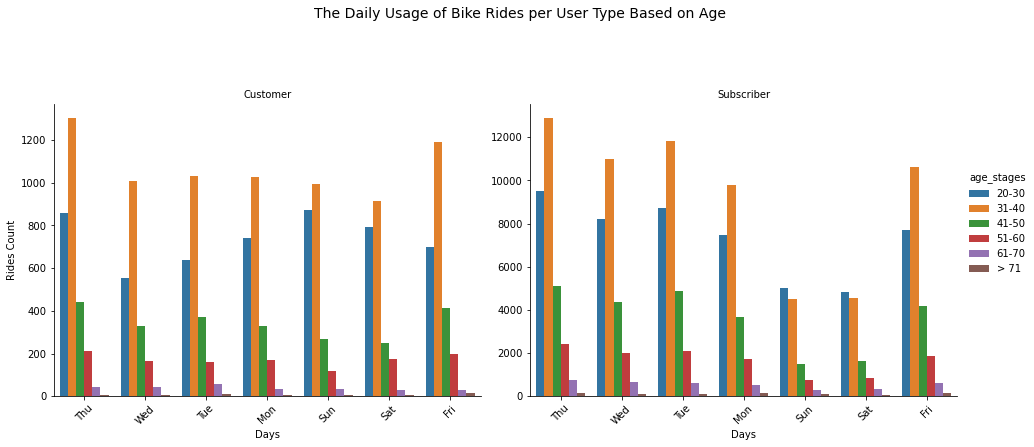

In [150]:
plt.figure(figsize = [25, 25])
lm = sns.catplot(data=df, x='start_time_weekOfDay', col="user_type", hue='age_stages', kind='count', aspect=20/15,
                 sharey=False, hue_order=age_order)

lm.set_axis_labels('Days', 'Rides Count')
lm.set_xticklabels(rotation=45)
lm.set_titles('{col_name}')
lm.fig.suptitle('The Daily Usage of Bike Rides per User Type Based on Age', fontsize=14, y=1.2);


> - Customers and subscribers of the age group 31-40 are the largest in number of trips.
> -  Subscribers of the age group 20-30 are the largest in number of trips in weekends

## Trip Duration In minutes for Each User Type Based on Gender

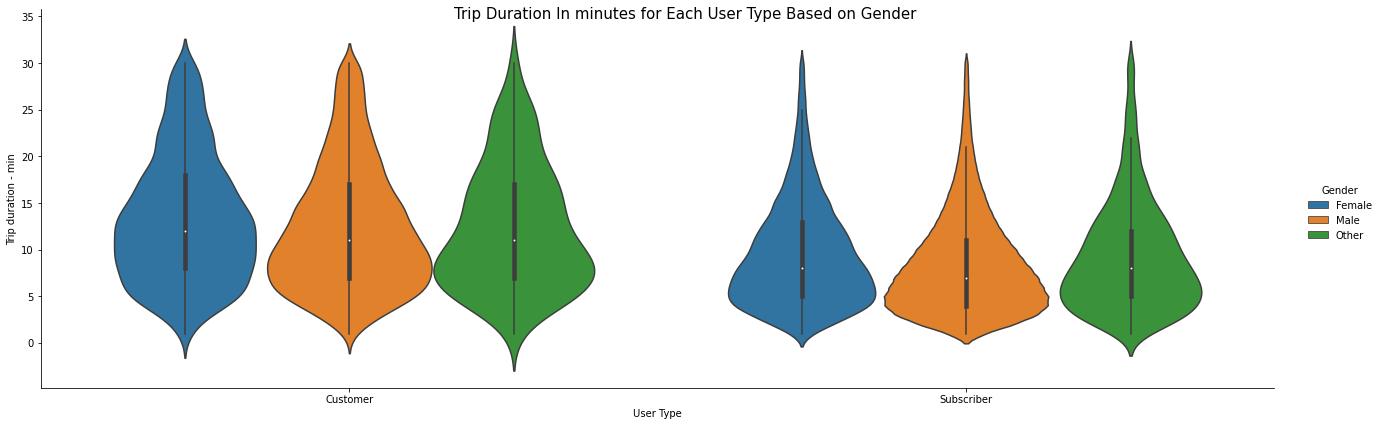

In [151]:
ax = sns.catplot(data=df.query("duration_min <= 30"), x='user_type', y="duration_min", hue="member_gender", kind="violin", height=6, aspect=3)
ax.set_axis_labels("User Type", "Trip duration - min")
ax._legend.set_title('Gender')
ax.fig.suptitle('Trip Duration In minutes for Each User Type Based on Gender', fontsize=15);


> - As shown in the chart above it is show the duration for each user type based on gender.
> - Customer users have higher duration than subscriber users.

## Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> - The multivariate exploration here showed me Subscribers use bicycles as a means of transportation to their work center or their study center, while customers exceed 1,500 trips throughout the week.
> - Men get the largest percentage of trips, As for the duration of the trip for customers, it is usually between 5-15 minutes, and the strange thing here is the duration of the subscribers' trip is less than for customers, as it often ranges between 5-10 minutes.
> - Most of the trips are between 7-9 am and 4-6 pm.